# 시계열 데이터(Time Series Data) 다루기

## I. 온도 예측 문제

- 문제 정의
    - 한 시간에 한 번씩 샘플링된 5일간의 데이터가 주어졌을 때 24시간 뒤의 온도를 예측
    - 데이터를 신경망에 주입할 수 있는 형태로 전처리해봄
    - 데이터 : 수치형이 되어 있어야 함
    - 각 시계열을 독립적으로 정규화하여 비슷한 범위를 가진 작은 값으로 바꿈

- DataSet
    - 독일 예나(Jena)시에 있는 막스 플랑크 생물지구화학연구소(Max Plank Institute for Biogeochemisty)의 기상 관측소에서 수집  
    - 수년간에 걸쳐(온도, 기압, 습도, 풍향 등) 14개의 관측치가 10분마다 기록되어 있음
    - 원본은 2003년부터 기록되어 있지만 2009~2016년 사이의 데이터 사용

|Feature Name|설명|
|:--:|:----|
| Date Time |날짜-시간 참조|
| p (mbar) |압력 단위|
| T (degC) | 섭씨 온도 |
| Tpot (K) | 켈빈 온도 |
| Tdew (degC) | 습도 |
| rh (%) | 상대 습도 |
| VPmax (mbar) | 포화 증기압 |
| VPact (mbar) | 증기압 |
| VPdef (mbar) | 증기압 부종 |
| sh (g/kg) | 비습도 |
| H2OC (mmol/mol) | 수증기 농도 |
| rho (g/m**3) | Airtight |
| wv (m/s) | 풍속 |
| max. wv (m/s) | 최대 풍속 |
| wd (deg) | 바람 방향 |

### 1. 데이터 다운로드 및 확인

#### 1. 데이터 다운로드

In [1]:
## 작업 위치 설정
import os

print(os.getcwd())
os.chdir("/Users/ryu/Desktop/Desktop ryuseungho's MacBook Air/Data Scientist/Study_Organization/DeepLearning/RNN(LSTM,GRU)/Data")
print(os.getcwd())

# 압축된 데이터 내려받기
# !wget https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
# 압축 풀기
# !unzip jena_climate_2009_2016.csv.zip

/Users/ryu/Desktop/Desktop ryuseungho's MacBook Air/Data Scientist/Study_Organization/DeepLearning/RNN(LSTM,GRU)
/Users/ryu/Desktop/Desktop ryuseungho's MacBook Air/Data Scientist/Study_Organization/DeepLearning/RNN(LSTM,GRU)/Data


#### 2. 데이터 확인

In [2]:
## 데이터 불러오기
import pandas as pd
df = pd.read_csv('./jena_climate_2009_2016.csv')

In [3]:
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420446,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420447,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420448,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420449,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


In [4]:
# 데이터 형태 확인 및 null값 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420451 entries, 0 to 420450
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Date Time        420451 non-null  object 
 1   p (mbar)         420451 non-null  float64
 2   T (degC)         420451 non-null  float64
 3   Tpot (K)         420451 non-null  float64
 4   Tdew (degC)      420451 non-null  float64
 5   rh (%)           420451 non-null  float64
 6   VPmax (mbar)     420451 non-null  float64
 7   VPact (mbar)     420451 non-null  float64
 8   VPdef (mbar)     420451 non-null  float64
 9   sh (g/kg)        420451 non-null  float64
 10  H2OC (mmol/mol)  420451 non-null  float64
 11  rho (g/m**3)     420451 non-null  float64
 12  wv (m/s)         420451 non-null  float64
 13  max. wv (m/s)    420451 non-null  float64
 14  wd (deg)         420451 non-null  float64
dtypes: float64(14), object(1)
memory usage: 48.1+ MB


### 2. 데이터 전처리

#### 2-1. 데이터 파싱
- Target 데이터 분리
    - Target : 온도(temperature)[ T (degC) ]

In [5]:
# 날짜 데이터(Date Time)
DateTime = df.iloc[:,0]

# 날짜 데이터를 제외한 나머지 데이터
raw_data = df.iloc[:,1:]

# 기온 데이터
temperature = raw_data['T (degC)']

#### 2-2. 데이터 시각화

In [10]:
import matplotlib.pyplot as plt
# 한글 깨짐 해결
plt.rcParams['font.family'] = 'AppleGothic' # window : Malgun Gothic | mac OS : AppleGothic
# 마이너스기호(-)깨짐 해결
plt.rcParams['axes.unicode_minus'] = False

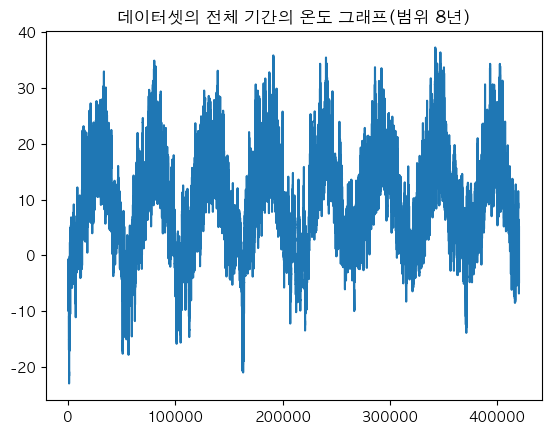

In [11]:
## 데이터셋의 전체 기간의 온도 그래프(범위 8년)

plt.title('데이터셋의 전체 기간의 온도 그래프(범위 8년)')
plt.plot(range(len(temperature)), temperature)
plt.show()

- 매년 온도에 **주기성**이 있다는 것을 볼 수 있음

### 2-3. 데이터 분할
- 각 분할에 사용할 샘플 개수 계산
    - Train Data : 50%
    - Val Data : 25%
    - Test Data : 25%

In [12]:
train_samples_n = int(0.5 * len(raw_data))
val_samples_n = int(0.25 * len(raw_data))
test_samples_n = len(raw_data) - train_samples_n - val_samples_n
print(f"Train Data 개수 : {train_samples_n}")
print(f"Val Data 개수 : {val_samples_n}")
print(f"Test Data 개수 : {test_samples_n}")

Train Data 개수 : 210225
Val Data 개수 : 105112
Test Data 개수 : 105114


#### 2-4. 데이터 정규화

- 이미 수치형이기 때문에 벡터화가 필요 X

In [13]:
# 시계열은 스케일이 각각 다르므로 독립적으로 정규화(평균과 표준편차 사용)
mean = raw_data[:train_samples_n].mean(axis = 0)
raw_data -= mean
std = raw_data[:train_samples_n].std(axis = 0)
raw_data /= std

#### 2-5. 데이터 분할
- 과거 5일치 데이터와 24시간 뒤 타깃 온도의 배치를 반환하는 Dataset 객체
- 과정

  I. 현재 데이터의 시간 단위(10분)와 예측하려는 시간 단위(1시간)을 통일

  - 10분 * 6 = 60분(1시간)

  - $sampling\_rate = 6$

  II. 사용할 데이터의 기간 정의 (5일 = 120시간)

  - $sequence\_length = 120$
  - $sequence\_stride = 1$

  III. 예측 시점(24시간 뒤)

  - $delay = sampling\_rate * (sequence\_length + 24 - 1)$
  - ***이틀 뒤를 예측***
    - $delay = sampling\_rate * (sequence\_length + 48 -1)$

<img src='https://p.ipic.vip/k0njck.png'>

- timeseries_dataset_from_array() : 중복된 데이터 때문에 생기는 메모리 낭비를 줄여줌

<details>
<summary>Option</summary>
    
```python
tf.keras.utils.timeseries_dataset_from_array(
        data,
        targets,
        sequence_length,
        sequence_stride = 1,
        sampling_rate = 1,
        batch_size = 128,
        shuffle = Fasle,
        seed None,
        start_index = None,
        end_index = None
    )
```  
    
|Option|Explanation|  
|:---|:--------------------:|
| data | 타깃 데이터를 제외한 데이터 |
| targets | 타깃 데이터 |
| sequence_length | 출력 시퀀스의 길이(시간 단계 수) |
| sequence_stride | 연속 출력 시퀀스 사이의 기간 |
| sampling_rate | ~ |
| batch_size | 각 배치의 시계열 샘플 수(마지막 제외) |
| shuffle | 출력 샘플을 섞을지 말지 |
| seed | 고정값 |
| start_index | 사용할 데이터의 시작 인덱스 위치 |
| end_index | 사용할 데이터의 끝 인덱스 위치 |

</details>

In [14]:
from tensorflow import keras

sampling_rate = 6  # 시간당 하나의 데이터 포인트가 샘플링됨
sequence_length = 120 # 이전 5일(120시간)의 데이터 사용
delay = sampling_rate * (sequence_length + 24 - 1)    # 시퀀스 끝에서 24시간 후의 온도
batch_size = 256

# Training Data : 0 ~ train_samples_n
train_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets = temperature[delay:],
    sampling_rate = sampling_rate,
    sequence_length = sequence_length,
    shuffle = True,
    batch_size = batch_size,
    start_index = 0,
    end_index = train_samples_n
)

# Validation Data : train_samples_n ~ train_samples_n + val_samples_n
val_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets = temperature[delay:],
    sampling_rate = sampling_rate,
    sequence_length = sequence_length,
    shuffle = True,
    batch_size = batch_size,
    start_index = train_samples_n,
    end_index = train_samples_n + val_samples_n
)

# Test Data : train_samples_n + val_sampes_n + End
test_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets = temperature[delay:],
    sampling_rate = sampling_rate,
    sequence_length = sequence_length,
    shuffle = True,
    batch_size = batch_size,
    start_index = train_samples_n + val_samples_n
)

2023-05-12 11:58:23.676217: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-12 11:58:29.513282: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [15]:
for samples, targets in train_dataset:
    print(f"샘플 크기 : {samples.shape}")
    print(f"타깃 크기 : {targets.shape}")
    break

샘플 크기 : (256, 120, 14)
타깃 크기 : (256,)


→ 샘플 크기 : (batch_size, sequence_length, column 개수)

### 3. 모델 정의

#### 3-1. 순환 신경망(RNN; Recurrent Neural Network)
- 순차적인 데이터(Sequence Data)를 처리하기 위한 인공 신경망
    - 어떤 특정 부분이 반복되는 구조에서 순서를 학습하기에 효과적
    - 시계열 데이터, 자연어 등에 적용 가능
    - 기존 Neural Network와 달리 '기억(Hidden State)'를 가지고 있음
    - 은닉 계층 안에 하나 이상의 순환 계층을 갖는 신경망 구조
        - 이전 단계의 출력 값이 현재 단계의 입력 값으로 다시 들어가는 반복 구조
        - 가중치가 모든 타임 스텝에서 공유됨

<details>
<summary>RNN Process</summary>

<img src='https://p.ipic.vip/kk81uo.png'>

</details>

In [209]:
inputs = keras.Input(shape = (sequence_length, raw_data.shape[-1]))
x = keras.layers.SimpleRNN(16)(inputs)
outputs = keras.layers.Dense(1)(x)
model = keras.Model(inputs, outputs)
model.summary()

Model: "model_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_25 (InputLayer)        [(None, 120, 14)]         0         
_________________________________________________________________
simple_rnn_14 (SimpleRNN)    (None, 16)                496       
_________________________________________________________________
dense_72 (Dense)             (None, 1)                 17        
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


#### 3-2. LSTM ; Long Short Term Memory

- RNN의 **장기의존성 문제**와 **기울기 소실 문제**를 해결한 알고리즘
    - 가중치 행렬$W$의 행렬 곱 연산이 그레이디언트 경로에 나타나지 않도록 구조 변경
- 기존 RNN에 장기 기억 셀(Cell State)을 추가함
    - $c_t$를 연결하는 경로에는 가중치 행렬 $W$의 행렬 곱 연산이 없음
    <img src='https://p.ipic.vip/devzvc.png' width=80%>
- 장기 기억 셀 연산에 사용되는 게이트 추가
    - Fprget Gate($f_t$) : 과거의 정보를 얼마나 유지할 것인가?
    - Input Gate($i_t$) : 새로 입력된 정보를 얼만큼 활용할 것인가?
    - Output Gate($o_t$) : Cell State에서 나온 정보를 얼마나 출력할 것인가? 

<details>
<summary>LSTM Process</summary>

![RNN(LSTM,GRU)_4](https://p.ipic.vip/73bjz5.png)

</details>

In [210]:
inputs = keras.Input(shape = (sequence_length, raw_data.shape[-1]))
x = keras.layers.LSTM(32)(inputs)
outputs = keras.layers.Dense(1)(x)
model = keras.Model(inputs, outputs)
model.summary()

Model: "model_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_26 (InputLayer)        [(None, 120, 14)]         0         
_________________________________________________________________
lstm_43 (LSTM)               (None, 32)                6016      
_________________________________________________________________
dense_73 (Dense)             (None, 1)                 33        
Total params: 6,049
Trainable params: 6,049
Non-trainable params: 0
_________________________________________________________________


#### 3-3. GRU ; Gated Recureent Unit

LSTM의 장점을 유지하면서 게이트 구조를 단순하게 만든 순환 신경망

- 업데이트 게이트(Update Gate) = Forget Gate + Input Gate
  - 과거의 기억중 사용할 정보의 양과 현 시점의 입력 정보 중 사용할 정보 수집
- 리셋 게이트(Reset Gate)
  - 현 시점의 입력 정보 중 새로운 정보를 추가할 때, 과거의 기억 중 필요한 정보의 양 계산
- 장기 기억 셀(Cell State)을 삭제
  - 은닉 상태($h_{t-1}$)가 장기 기억과 단기 기억 모두를 기억하도록 함
- 출력 게이트가 존재하지 않음
  - 전체 상태 벡터가 매 타임 스텝마다 출력

<details>
<summary>GRU Process</summary>

<img src='https://p.ipic.vip/6obmtd.png'>

</details>

In [212]:
inputs = keras.Input(shape = (sequence_length, raw_data.shape[-1]))
x = keras.layers.GRU(32)(inputs)
outputs = keras.layers.Dense(1)(x)
model = keras.Model(inputs, outputs)
model.summary()

Model: "model_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_28 (InputLayer)        [(None, 120, 14)]         0         
_________________________________________________________________
gru_22 (GRU)                 (None, 32)                4608      
_________________________________________________________________
dense_75 (Dense)             (None, 1)                 33        
Total params: 4,641
Trainable params: 4,641
Non-trainable params: 0
_________________________________________________________________


#### 3-4. 양방향 LSTM/GRU

- 양방향 순환 층(Bidirectional Recurrent Layer)  
    - 순환 네트워크에 같은 정보를 다른 방향으로 주입하여 정확도를 높이고 기억을 좀 더 오래 유지
    - 이전의 층이 전체 출력 시퀀스를 반환해야 함 [ return_sequence = True ]

<details>
<summary>양방향 LSTM/GRU</summary>

<img src='https://p.ipic.vip/0oj5et.png'>

</details>

In [213]:
inputs = keras.Input(shape = (sequence_length, raw_data.shape[-1]))
x = keras.layers.Bidirectional(keras.layers.LSTM(16))(inputs)
outputs = keras.layers.Dense(1)(x)
model = keras.Model(inputs, outputs)
model.summary()

Model: "model_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_29 (InputLayer)        [(None, 120, 14)]         0         
_________________________________________________________________
bidirectional_11 (Bidirectio (None, 32)                3968      
_________________________________________________________________
dense_76 (Dense)             (None, 1)                 33        
Total params: 4,001
Trainable params: 4,001
Non-trainable params: 0
_________________________________________________________________


#### 3-5. 1D CNN + LSTM/GRU

<details>
<summary>1D CNN + LSTM/GRU</summary>
<img src='https://p.ipic.vip/bzx124.png'>

</details>

In [215]:
inputs = keras.Input(shape = (sequence_length, raw_data.shape[-1]))
x = keras.layers.Conv1D(filters=32,
               kernel_size=8,
               strides=1,
               activation='relu')(inputs)
x = keras.layers.MaxPooling1D(pool_size = 4)(x)
x = keras.layers.LSTM(32)(x)
outputs = keras.layers.Dense(1)(x)
model = keras.Model(inputs, outputs)
model.summary()

Model: "model_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_31 (InputLayer)        [(None, 120, 14)]         0         
_________________________________________________________________
conv1d_50 (Conv1D)           (None, 113, 32)           3616      
_________________________________________________________________
max_pooling1d_26 (MaxPooling (None, 28, 32)            0         
_________________________________________________________________
lstm_46 (LSTM)               (None, 32)                8320      
_________________________________________________________________
dense_78 (Dense)             (None, 1)                 33        
Total params: 11,969
Trainable params: 11,969
Non-trainable params: 0
_________________________________________________________________


### 4. 모델 학습

In [216]:
model.compile(optimizer = 'rmsprop', loss = 'mse', metrics=['mae'])
history = model.fit(train_dataset,
                   epochs = 50,
                   validation_data = val_dataset)

Epoch 1/50
819/819 [==============================] - 10s 10ms/step - loss: 18.8326 - mae: 3.1639 - val_loss: 11.3457 - val_mae: 2.6436
Epoch 2/50
819/819 [==============================] - 8s 9ms/step - loss: 7.5487 - mae: 2.1354 - val_loss: 12.3939 - val_mae: 2.7926
Epoch 3/50
819/819 [==============================] - 8s 9ms/step - loss: 6.1319 - mae: 1.9127 - val_loss: 13.2097 - val_mae: 2.8667
Epoch 4/50
819/819 [==============================] - 8s 9ms/step - loss: 5.3190 - mae: 1.7756 - val_loss: 13.8082 - val_mae: 2.9343
Epoch 5/50
819/819 [==============================] - 8s 9ms/step - loss: 4.7604 - mae: 1.6784 - val_loss: 14.2529 - val_mae: 2.9634
Epoch 6/50
819/819 [==============================] - 8s 9ms/step - loss: 4.3245 - mae: 1.5984 - val_loss: 14.4667 - val_mae: 2.9821
Epoch 7/50
819/819 [==============================] - 7s 9ms/step - loss: 3.9437 - mae: 1.5281 - val_loss: 14.8976 - val_mae: 3.0351
Epoch 8/50
819/819 [==============================] - 8s 9ms/step 

### 5. 고급 기법

#### 5-1. 스태킹 순환 층(Stacking Recurrent Layer)
- 모델의 표현 능력(Representational Power)을 증가 시킴  

In [37]:
# 스태킹
inputs = keras.Input(shape = (sequence_length, raw_data.shape[-1]))
x = keras.layers.GRU(32, return_sequences = True)(inputs)
x = keras.layers.GRU(32)(x)
outputs = keras.layers.Dense(1)(x)
model = keras.Model(inputs, outputs)


model.compile(optimizer = 'rmsprop', loss = 'mse',  metrics = ['mae'])
history = model.fit(train_dataset,
                    epochs = 50,
                    validation_data = val_dataset)

Epoch 1/50
819/819 [==============================] - 19s 19ms/step - loss: 20.7605 - mae: 3.2645 - val_loss: 9.1614 - val_mae: 2.3476
Epoch 2/50
819/819 [==============================] - 15s 19ms/step - loss: 8.7637 - mae: 2.3062 - val_loss: 9.8531 - val_mae: 2.4330
Epoch 3/50
819/819 [==============================] - 15s 18ms/step - loss: 7.7038 - mae: 2.1745 - val_loss: 9.8144 - val_mae: 2.4462
Epoch 4/50
819/819 [==============================] - 15s 19ms/step - loss: 6.7814 - mae: 2.0463 - val_loss: 10.4869 - val_mae: 2.5180
Epoch 5/50
819/819 [==============================] - 15s 18ms/step - loss: 6.0027 - mae: 1.9226 - val_loss: 11.8817 - val_mae: 2.6752
Epoch 6/50
819/819 [==============================] - 15s 19ms/step - loss: 5.3034 - mae: 1.8030 - val_loss: 11.6635 - val_mae: 2.6475
Epoch 7/50
819/819 [==============================] - 15s 19ms/step - loss: 4.7214 - mae: 1.7000 - val_loss: 12.7908 - val_mae: 2.7771
Epoch 8/50
819/819 [==============================] - 15s

#### 5-2. 순환 드롭아웃(Recurrent Dropout) 
- 드롭아웃의 한 종류로 순환 층에서 과대적합을 방지하기 위해 사용
- 조건 : 모든 중간층은 전체 출력 시퀀스를 반환해야 함 [return_sequence = True]

In [19]:
# 드롭아웃
inputs = keras.Input(shape = (sequence_length, raw_data.shape[-1]))
x = keras.layers.GRU(32, recurrent_dropout = 0.5, return_sequences = True)(inputs)
x = keras.layers.GRU(32, recurrent_dropout = 0.5)(x)
x = keras.layers.Dropout(0.5)(x)
outputs = keras.layers.Dense(1)(x)
model = keras.Model(inputs, outputs)


model.compile(optimizer = 'rmsprop', loss = 'mse', metrics=['mae'])
history = model.fit(train_dataset,
                   epochs = 50,
                   validation_data = val_dataset)

Epoch 1/50
819/819 [==============================] - 504s 612ms/step - loss: 25.6638 - mae: 3.7360 - val_loss: 9.7905 - val_mae: 2.4143
Epoch 2/50
819/819 [==============================] - 494s 603ms/step - loss: 14.0098 - mae: 2.9012 - val_loss: 9.7943 - val_mae: 2.4303
Epoch 3/50
819/819 [==============================] - 496s 606ms/step - loss: 13.1811 - mae: 2.8184 - val_loss: 9.6573 - val_mae: 2.4038
Epoch 4/50
819/819 [==============================] - 500s 610ms/step - loss: 12.5538 - mae: 2.7486 - val_loss: 9.1804 - val_mae: 2.3410
Epoch 5/50
819/819 [==============================] - 497s 607ms/step - loss: 12.0851 - mae: 2.6958 - val_loss: 10.2158 - val_mae: 2.4681
Epoch 6/50
819/819 [==============================] - 500s 610ms/step - loss: 11.6978 - mae: 2.6546 - val_loss: 9.2993 - val_mae: 2.3602
Epoch 7/50
819/819 [==============================] - 497s 607ms/step - loss: 11.3450 - mae: 2.6168 - val_loss: 10.1305 - val_mae: 2.4635
Epoch 8/50
819/819 [===================

#### 5-3. Early Stopping
- 너무 많은 Epoch는 overfitting을 일으킨다.  
- 너무 적은 Epoch는 underfitting을 일으킨다  
- Epoch를 많이 돌린 후, 특정 시점에서 멈춤

In [13]:
# Early Stopping
from keras.callbacks import EarlyStopping

inputs = keras.Input(shape = (sequence_length, raw_data.shape[-1]))
x = keras.layers.GRU(32, recurrent_dropout = 0.5, return_sequences = True)(inputs)
x = keras.layers.GRU(32, recurrent_dropout = 0.5)(x)
x = keras.layers.Dropout(0.5)(x)
outputs = keras.layers.Dense(1)(x)
model = keras.Model(inputs, outputs)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

model.compile(optimizer = 'rmsprop', loss = 'mse', metrics=['mae'])
history = model.fit(train_dataset,
                   epochs = 50,
                   validation_data = val_dataset,
                   callbacks = [early_stopping])

Epoch 1/50
819/819 [==============================] - 501s 608ms/step - loss: 27.5714 - mae: 3.8488 - val_loss: 9.9952 - val_mae: 2.4443
Epoch 2/50
819/819 [==============================] - 497s 607ms/step - loss: 13.9617 - mae: 2.8960 - val_loss: 8.9847 - val_mae: 2.3212
Epoch 3/50
819/819 [==============================] - 496s 605ms/step - loss: 13.1481 - mae: 2.8131 - val_loss: 8.9414 - val_mae: 2.3150
Epoch 4/50
819/819 [==============================] - 494s 603ms/step - loss: 12.6829 - mae: 2.7626 - val_loss: 8.8438 - val_mae: 2.3150
Epoch 5/50
819/819 [==============================] - 494s 603ms/step - loss: 12.2708 - mae: 2.7164 - val_loss: 9.1045 - val_mae: 2.3352
Epoch 6/50
819/819 [==============================] - 493s 602ms/step - loss: 11.8606 - mae: 2.6714 - val_loss: 9.5416 - val_mae: 2.3956
Epoch 7/50
819/819 [==============================] - 498s 608ms/step - loss: 11.4571 - mae: 2.6260 - val_loss: 9.2911 - val_mae: 2.3589
Epoch 8/50
819/819 [=====================